In this part of our project, we want to investigate whether a whole population can become extinct from a epidemic. To do this, we have introduced a differentiation between recovered and dead individuals. In a normal SIR, the recovered state (R) contains both of these groups, and it is therefore not possible to distinguish and count the number of deaths. 
After some experimentation with our different models, we found that we could come closest to an extinct population with our SIRS model. In this model, the possibility of going from R to S makes the individuals who survived the disease in the first place susceptible again - and therefore in risk of dying from the disease at a later time. In a normal SIR, all individuals who have made it to the recovered state will be safe - and with even a small recovered_rate/death_rate ratio, the population will not become extinct. 

To find parameter values that create a very deadly epidemic, we have experimented with different combinations of probabilities of going from infected to recovered and from infected to dead (D). We found that high values of both of these could easily kill off the epidemic in the beginning as people would not be in the infected state long enough to infect others. We have therefore experimented with all combinations of these three probabilities of going from both I to R and I to D in each time step: $[0.01,0.02,0.05]$. 
We have used fixed rates for the probabilities of going from S to I and R to S to get a manageable number of combinations. Again, we have here experimented with different probabilities and found that we get the highest number of deaths with $prob_{RS} = 0.8$ and $prob_{SI} = 0.7$. 
Below, we have run the combinations of all these probabilities and outputted a table with the resulting mean number of deaths during the epidemic. 

In [51]:
# Initialization
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from tabulate import tabulate

In [43]:
# Initialize statitistics matrix
statistics = np.array([np.zeros(8)])

n = 1000

# Fixed rates
prob_R_S = 0.8
prob_S_I = 0.7

for prob_I_R in [0.01,0.02,0.05]:
    for prob_I_D in [0.01,0.02,0.05]:

        I_max = np.array([])
        D_max = np.array([])

        for i in range(100):

            # Vector of states
            states = np.repeat("S",n)
            states[0] = "I"

            n_S = np.array([len(np.where(states == "S")[0])])
            n_I = np.array([len(np.where(states == "I")[0])])
            n_R = np.array([len(np.where(states == "R")[0])])
            n_D = np.array([len(np.where(states == "D")[0])])


            while "I" in states or "R" in states:

                # Get positions of S, I, R
                S_index = np.where(states == "S")[0]
                I_index = np.where(states == "I")[0]
                R_index = np.where(states == "R")[0]

                # Update susceptible
                prob_S_I_t = prob_S_I * len(I_index)/n
                states[S_index] = np.random.choice(np.array(["S","I"]),p = np.array([1-prob_S_I_t, prob_S_I_t]), size = len(S_index))


                # Update infected
                states[I_index] = np.random.choice(np.array(["I", "R", "D"]),p = np.array([1-prob_I_R - prob_I_D, prob_I_R, prob_I_D]), size = len(I_index))


                # Update recovered
                states[R_index] = np.random.choice(np.array(["R", "S"]),p = np.array([1-prob_R_S, prob_R_S]), size = len(R_index))


                n_S = np.concatenate([n_S, np.array([len(np.where(states == "S")[0])])])
                n_I = np.concatenate([n_I, np.array([len(np.where(states == "I")[0])])])
                n_R = np.concatenate([n_R, np.array([len(np.where(states == "R")[0])])])
                n_D = np.concatenate([n_D, np.array([len(np.where(states == "D")[0])])])


            # Safe statistics for this combination of rates
            I_max_run = np.max(n_I)
            I_max = np.append(I_max, I_max_run)

            D_max_run = np.max(n_D)
            D_max = np.append(D_max, D_max_run)


        # Update statistics matrix
        # Infected
        I_max_mean = np.mean(I_max)
        I_max_sd = np.std(I_max)
        conf_I = stats.t.interval(alpha=0.95, df=len(I_max)-1, loc=np.mean(I_max), scale=stats.sem(I_max))

        # Deaths 
        D_max_mean = np.mean(D_max)
        D_max_sd = np.std(D_max)
        conf_D = stats.t.interval(alpha=0.95, df=len(D_max)-1, loc=np.mean(D_max), scale=stats.sem(D_max))
        
        # All stats
        new_stats = (prob_I_R, prob_I_D, I_max_mean, I_max_sd, np.round(conf_I,2), D_max_mean, D_max_sd, np.round(conf_D,2))
        statistics = np.vstack((statistics, new_stats))
        

# Print statistics table
print(tabulate(statistics[1:,], headers=["I --> R", "I --> D", "I max mean", "I max sd", "CI I max mean", "D max mean", "D max sd", "CI D max mean"], tablefmt='orgtbl'))
        
                

|   I --> R |   I --> D |   I max mean |   I max sd | CI I max mean   |   D max mean |   D max sd | CI D max mean   |
|-----------+-----------+--------------+------------+-----------------+--------------+------------+-----------------|
|      0.01 |      0.01 |       892.52 |    156.996 | [861.21 923.83] |       955.63 |    167.928 | [922.14 989.12] |
|      0.01 |      0.02 |       857.4  |    122.811 | [832.91 881.89] |       965.18 |    137.787 | [937.7  992.66] |
|      0.01 |      0.05 |       745.43 |    107.402 | [724.01 766.85] |       965.77 |    137.866 | [938.28 993.26] |
|      0.02 |      0.01 |       859    |    175.405 | [824.02 893.98] |       930.56 |    189.963 | [892.68 968.44] |
|      0.02 |      0.02 |       837.15 |    120.07  | [813.21 861.09] |       950.95 |    135.95  | [923.84 978.06] |
|      0.02 |      0.05 |       689.05 |    189.343 | [651.29 726.81] |       901.11 |    247.028 | [851.85 950.37] |
|      0.05 |      0.01 |       814.9  |    116.784 | [7

As we see in the table, the closest to extinction we have been able to get is that a mean of 965 individuals out of 1000 die (in 100 simulations). The confidence interval for the mean of deaths lies highest with $prob_{IR} = 0.01$ and $prob_{ID} = 0.05$. Here, the 95% confidence interval for the mean number of deaths is $[938.28, 993.26]$. 
This means that we have not been able to find a combination of parameters where all individuals in our population die. But as we have not tried every possible combination of parameters, we can't say for sure that it will never happen.

Below we have plotted one simulation of an epidemic with the "optimal" parameters found above; 
$$prob_{RS} = 0.8\\
prob_{SI} = 0.7\\
prob_{IR} = 0.01\\
prob_{ID} = 0.05$$

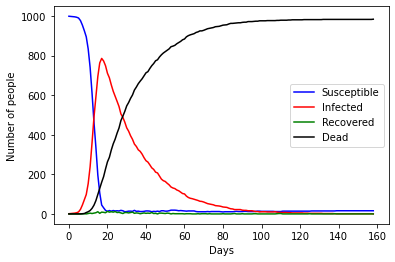

In [45]:
# Vector of states
states = np.repeat("S",n)
states[0] = "I"

# Probabilities of entering different states
prob_R_S = 0.8
prob_S_I = 0.7
prob_I_R = 0.01
prob_I_D = 0.05

n_S = np.array([len(np.where(states == "S")[0])])
n_I = np.array([len(np.where(states == "I")[0])])
n_R = np.array([len(np.where(states == "R")[0])])
n_D = np.array([len(np.where(states == "D")[0])])


while "I" in states or "R" in states:

    # Get positions of S, I, R
    S_index = np.where(states == "S")[0]
    I_index = np.where(states == "I")[0]
    R_index = np.where(states == "R")[0]

    # Update susceptible
    prob_S_I_t = prob_S_I * len(I_index)/n
    states[S_index] = np.random.choice(np.array(["S","I"]),p = np.array([1-prob_S_I_t, prob_S_I_t]), size = len(S_index))


    # Update infected
    states[I_index] = np.random.choice(np.array(["I", "R", "D"]),p = np.array([1-prob_I_R - prob_I_D, prob_I_R, prob_I_D]), size = len(I_index))


    # Update recovered
    states[R_index] = np.random.choice(np.array(["R", "S"]),p = np.array([1-prob_R_S, prob_R_S]), size = len(R_index))


    n_S = np.concatenate([n_S, np.array([len(np.where(states == "S")[0])])])
    n_I = np.concatenate([n_I, np.array([len(np.where(states == "I")[0])])])
    n_R = np.concatenate([n_R, np.array([len(np.where(states == "R")[0])])])
    n_D = np.concatenate([n_D, np.array([len(np.where(states == "D")[0])])])
                
plt.figure()
plt.plot(n_S, "-b", label = "Susceptible")
plt.plot(n_I, "-r", label = "Infected")
plt.plot(n_R, "-g", label = "Recovered")
plt.plot(n_D, "-0", label = "Dead")
plt.ylabel("Number of people")
plt.xlabel("Days")
plt.legend()
plt.show()

With these parameter values, we see that the number of infected individuals is highest after approximately 18 days but that the epidemic lasts more than 100 days all together. We see very few recovered individuals at all times which makes sense as the probability of going from recovered to susceptible is 0.8 in each time step. After the initial decline, we also see very few susceptibles at all times. This also makes sense as the probability of going from susceptible to infected in each time step is 0.7. These probabilities lead to the high number of deaths as the individuals will go very quicly between susceptible, infected, and recovered again and again until they die.  
The number of infected individuals gradually declines after the maximum has been reached. The slow decline is due to the constant emergance of new susceptibles that then become infected. 